In [1]:
# take a quick look at the data

i = 0
for line in open('#TheLeftovers_2015-10-04 20:41:10 -0400.json', 'r'):
    print line
    i+=1
    if i == 5:
        break

{

  "created_at": "Mon Oct 05 00:41:19 +0000 2015",

  "id": 650833106275028992,

  "id_str": "650833106275028992",

  "text": "Sooooo excited for Season 2 of #TheLeftovers after #OnceUponATime and then the Season 2 finale of #TheStrain after that! Great TV night!",



In [2]:
tweets = []        # Initialize an empty list

for line in open('#TheLeftovers_2015-10-04 20:41:10 -0400.json', 'r'):
    
    if line[:8] == '  "text"':   # Does the current line begin with this text?
        
        tweets.append(line[11:-3])    # If so, add the desired text to the list called tweets
        
for i in range(3):
    print tweets[i]
    print '\n'

Sooooo excited for Season 2 of #TheLeftovers after #OnceUponATime and then the Season 2 finale of #TheStrain after that! Great TV night!


#TheLeftovers


I could not be more excited for #TheLeftovers season 2 tonight!




In [3]:
# we don't need every line, let's only select the data we're interested in

tweets = []
times = []
retweets = []
location = []
language = []
listed = []
name = []
following = []
time_zone = []

# identify the field, and save the appropriate record

for line in open('#TheLeftovers_2015-10-04 20:41:10 -0400.json', 'r'):
    if line[:8] == '  "text"':
        tweets.append(line[11:-3])
    elif line[:14] == '  "created_at"':
        times.append(line[28:-14])
    elif line[:29] == '  "in_reply_to_screen_name": ':
        retweets.append(line[29:-2])
    elif line[:15] == '    "location":':
        location.append(line[16:-3])
    elif line[:18] == '    "screen_name":':
        name.append(line[19:-2])
    elif line[:20] == '    "listed_count": ':
        listed.append(int(line[20:-2]))
    elif line[:12] == '    "lang": ':
        language.append(line[12:-2])    
    elif line[:16] == '    "time_zone":':
        time_zone.append(line[17:-2])
    elif line[:15] == '    "following"':
        following.append(line[17:-2])
        
for line in open('#TheLeftovers_2015-10-04 22:03:25 -0400.json', 'r'):
    if line[:8] == '  "text"':
        tweets.append(line[11:-3])
    elif line[:14] == '  "created_at"':
        times.append(line[28:-14])
    elif line[:29] == '  "in_reply_to_screen_name": ':
        retweets.append(line[29:-2])
    elif line[:15] == '    "location":':
        location.append(line[16:-3])
    elif line[:18] == '    "screen_name":':
        name.append(line[19:-2])
    elif line[:20] == '    "listed_count": ':
        listed.append(int(line[20:-2]))
    elif line[:12] == '    "lang": ':
        language.append(line[12:-2])    
    elif line[:16] == '    "time_zone":':
        time_zone.append(line[17:-2])
    elif line[:15] == '    "following"':
        following.append(line[17:-2])

In [4]:
# check data length

print len(name)
print len(time_zone)
print len(following)
print len(location)
print len(tweets)
print len(times)
print len(retweets)
print len(listed)
print len(language)  

# Language requires cleaning, not usable in aggregation

4712
4712
4712
4712
4712
4712
4712
4712
6199


In [5]:
import pandas as pd
from collections import Counter
pd.DataFrame({'Name': Counter(retweets).keys(), 'Retweets': Counter(retweets).values()}).sort(['Retweets'],ascending = False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Name,Retweets
14,null,4539
73,"""TheLeftoversHBO""",31
29,"""kenseysmom""",18
22,"""Jazz_minBrown""",14
81,"""slut_kin""",5


In [6]:
from collections import Counter
df = pd.DataFrame({'Time Zone': Counter(time_zone).keys(),'Count': Counter(time_zone).values()})
df.sort(['Count'],ascending = False)[:10]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Count,Time Zone
49,1040,"""Eastern Time (US & Canada)"""
15,1029,null
62,716,"""Central Time (US & Canada)"""
12,503,"""Pacific Time (US & Canada)"""
11,487,"""Brasilia"""
9,198,"""Quito"""
16,138,"""Santiago"""
25,129,"""Atlantic Time (Canada)"""
38,66,"""Greenland"""
1,56,"""Mountain Time (US & Canada)"""


In [7]:
pd.DataFrame({'Language': Counter(language).keys(), 'Count': Counter(language).values()}).sort(['Count'],ascending = False)[:10]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Count,Language
6,3790,"""en"""
8,1220,"""en"
1,554,"""pt"""
2,295,"""es"""
12,153,"""pt"
13,90,"""es"
22,20,"""fr"""
20,13,"""en-gb"""
19,11,"""und"
11,7,"""it"""


In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
    
tokenized = [tokenizer.tokenize(doc) for doc in tweets]

tokenized[0]

['Sooooo',
 'excited',
 'for',
 'Season',
 '2',
 'of',
 'TheLeftovers',
 'after',
 'OnceUponATime',
 'and',
 'then',
 'the',
 'Season',
 '2',
 'finale',
 'of',
 'TheStrain',
 'after',
 'that',
 'Great',
 'TV',
 'night']

In [9]:
leftovers = pd.DataFrame({'Name': name,
                         'Time Zone': time_zone,
                         'Location': location,
                         'Tweet': tokenized,
                         'Time': times,
                         'Listed Count': listed,
                         'Retweet at': retweets,
                         })
leftovers.to_csv('leftovers.csv',sep=',')
leftovers.head()

,Listed Count,Location,Name,Retweet at,Time,Time Zone,Tweet
0,65,"""New York State, USA","""Fan4me""",null,00:41:19,"""Eastern Time (US & Canada)""","[Sooooo, excited, for, Season, 2, of, TheLefto..."
1,2,"""Tallahassee, Florida","""howie1027""",null,00:41:19,"""Eastern Time (US & Canada)""",[TheLeftovers]
2,155,"""Los Angeles","""WriterLe""",null,00:41:33,"""Pacific Time (US & Canada)""","[I, could, not, be, more, excited, for, TheLef..."
3,130,"""Baltimore, MD","""BrandonAmbro""",null,00:41:36,"""Eastern Time (US & Canada)""","[1, Advice, for, those, tuning, in, to, the, s..."
4,6,"""UK","""RyanLang999""",null,00:42:13,"""London""","[20, mins, TheLeftovers]"


In [10]:
import random

neg = [line[:-1] for line in open('negative-words.txt', 'r')]

for i in range(5):
    print random.choice(neg)

fickle
doggedly
puzzlement
unnerving
cheerless


In [11]:
import random
pos = [line[:-1] for line in open('positive-words.txt', 'r')]
for i in range(5):
    print random.choice(pos)

simplify
hardy
exceptionally
patriot
overtook


In [12]:
listed[:5]

[65, 2, 155, 130, 6]

In [13]:
p = []
for i in tokenized:
    count = 0.0
    for k in i:
        if k in pos:
            count += 1.0
    p.append(count)

In [14]:
n = []
for i in tokenized:
    count = 0.0
    for k in i:
        if k in neg:
            count += 1.0
    n.append(count)

In [15]:
print len(n)
print len(p)

4712
4712


In [16]:
import matplotlib.pyplot as plt
import datetime
import time

dates = [datetime.datetime.strptime(t, "%H:%M:%S") for t in times]

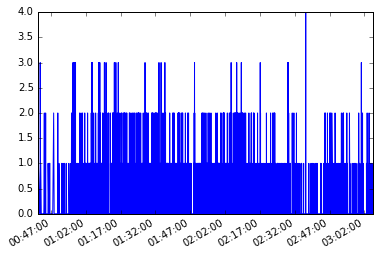

In [17]:
%matplotlib inline
plt.plot(dates,p);

plt.gcf().autofmt_xdate()

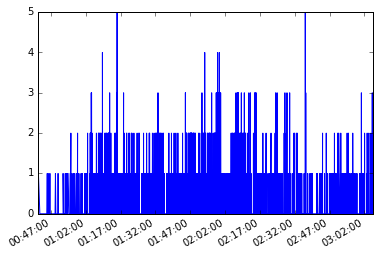

In [18]:
plt.plot(dates,n)
plt.gcf().autofmt_xdate()

In [19]:
#import seaborn as sns
#sns.kdeplot(abs(df[df['drug_390'] == 1].days), shade=True, label='drug 390');
#sns.kdeplot(abs(df[df['drug_390'] == 1].days), shade=True, label='drug 390')

In [20]:
t = []
dates2 = []  # Initialize empty lists

for i in range(len(dates)):    # Iterate through the timestamps
    
    if (str(dates[i].hour) + ':' + str(dates[i].minute)) not in dates2: # Have we seen it?
                
        dates2.append(str(dates[i].hour) + ':' + str(dates[i].minute))
        t.append(p[i] - n[i])   # If not, record the hour and minute, and calculate sentiment
    else:
        t[-1] += (p[i] - n[i])  # If yes, add the sentiment of the tweet to the current minute

In [21]:
# Aggregate data into one minute buckets

gp = []
gn = []
t = []
dates2 = []
li = []
num = []
words = []

for i in range(len(dates)):
    if (str(dates[i].hour) + ':' + str(dates[i].minute)) not in dates2:
        dates2.append(str(dates[i].hour) + ':' + str(dates[i].minute))
        li.append(listed[i])
        t.append(p[i] - n[i])
        num.append(1)
        words.append(tokenized[i])
    else:
        t[-1] += (p[i] - n[i])
        li[-1] += listed[i]
        num[-1] += 1
        words[-1] = words[-1] + tokenized[i]

In [22]:
stops = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [23]:
final_words = []
for i in words:
    final_words.append([w.lower() for w in i if w not in stops])
Counter(final_words[0])

Counter({'1': 1,
         '2': 4,
         'advice': 1,
         'confused': 1,
         'could': 1,
         'excited': 2,
         'finale': 1,
         'first': 1,
         'great': 1,
         'i': 1,
         'minutes': 1,
         'night': 1,
         'onceuponatime': 1,
         'premier': 1,
         'season': 4,
         'sooooo': 1,
         'ten': 1,
         'theleftovers': 4,
         'theleftovershbo': 1,
         'thestrain': 1,
         'tonight': 1,
         'tuning': 1,
         'tv': 1})

In [24]:
leftovers2 = pd.DataFrame({'Time': dates2,
                         'Tweet Count': num,
                         'Sentiment': t,
                         'Words': final_words,
                         'Listed Count': li,
                         })
leftovers2.to_csv('leftovers_by_minute.csv',sep=',')
leftovers2.head()

,Listed Count,Sentiment,Time,Tweet Count,Words
0,352,2,0:41,4,"[sooooo, excited, season, 2, theleftovers, onc..."
1,176,4,0:42,6,"[20, mins, theleftovers, theleftovers, season,..."
2,85,0,0:43,1,"[i, hope, opening, scene, justin, jogging, gre..."
3,801,6,0:44,11,"[we, made, remember, theleftovers, 18, minutes..."
4,481,-1,0:45,10,"[in, 15, minutes, meet, erika, murphy, n, regi..."


In [25]:
dates2[20:25]

['1:1', '1:2', '1:3', '1:4', '1:5']

In [26]:
def word_count(time1, time2):
    index1 = dates2.index(time1)
    index2 = dates2.index(time2)
    wrds = final_words[index1:(index2+1)]
    final = wrds[0]
    for i in range(1,len(wrds)):
        final = final + wrds[i]
    df = pd.DataFrame({'Word': Counter(final).keys(),
                       'Count': Counter(final).values()})
    print df.sort(['Count'],ascending = False)[:25]
    
word_count('2:0','2:10')

      Count              Word
905     563      theleftovers
117     172                rt
1276    149                co
1318    140                 i
1309    118              http
242      66                 n
964      57   theleftovershbo
532      56            season
1191     48               que
175      42                 m
1268     37           opening
405      37               hbo
525      35          tomorrow
313      31                 o
530      29                 2
174      28           episode
416      28             https
343      27  welcometomiracle
189      27                de
1216     26           tonight
1262     25          lindelof
635      25             damon
354      25          abertura
637      24              week
1198     23             scene


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


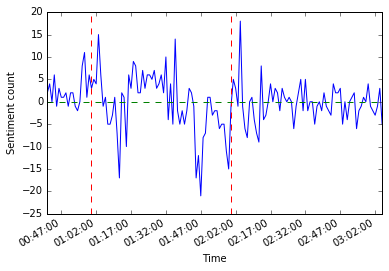

In [27]:
#for i in range(len(t)):
%matplotlib inline
plt.plot([datetime.datetime.strptime(y, "%H:%M") for y in dates2],t);
plt.axvline(datetime.datetime.strptime('1:00', "%H:%M"), color='r', linestyle='--')
plt.axvline(datetime.datetime.strptime('2:00', "%H:%M"), color='r', linestyle='--')
plt.axhline(0, color='g', linestyle='--')
plt.ylabel('Sentiment count')
plt.xlabel('Time')

plt.gcf().autofmt_xdate()

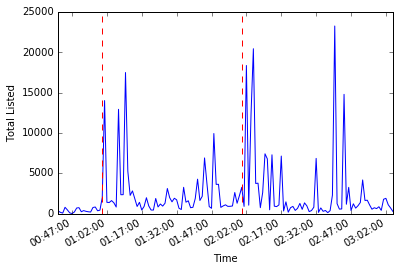

In [28]:
plt.plot([datetime.datetime.strptime(y, "%H:%M") for y in dates2],li);
plt.axvline(datetime.datetime.strptime('1:00', "%H:%M"), color='r', linestyle='--')
plt.axvline(datetime.datetime.strptime('2:00', "%H:%M"), color='r', linestyle='--')
plt.axhline(0, color='g', linestyle='--')
plt.ylabel('Total Listed')
plt.xlabel('Time')

plt.gcf().autofmt_xdate()

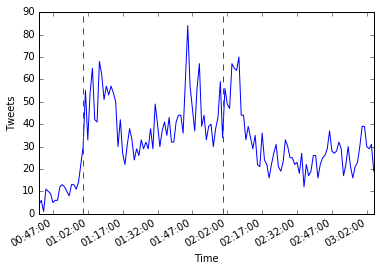

In [29]:
plt.plot([datetime.datetime.strptime(y, "%H:%M") for y in dates2],num);
plt.axvline(datetime.datetime.strptime('1:00', "%H:%M"), color='r', linestyle='--')
plt.axvline(datetime.datetime.strptime('2:00', "%H:%M"), color='r', linestyle='--')
plt.axhline(0, color='g', linestyle='--')
plt.ylabel('Tweets')
plt.xlabel('Time')


plt.gcf().autofmt_xdate()

In [32]:
Counter(language)

Counter({'"en': 3790, '"e': 1310, '"pt': 554, '"es': 295, '"p': 153, '"fr': 20, '"en-gb': 13, '"f': 11, '"un': 11, '"it': 7, '"pl': 7, '"ru': 7, '"es-MX': 5, '"de': 3, '"id': 2, '"he': 2, '"ar': 2, '"ca': 1, '"t': 1, '"s': 1, '"ja': 1, '"th': 1, '"no': 1, '"en-GB': 1})